In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import tqdm as tqdm

## 1. Write a Monte Carlo program to sample the configurations of a particle in 1D subject to a harmonic potential of stiffness $k=1$ at temperature $k_BT=1$,

$$
U(q) = \frac{1}{2}q^2
$$

_(Hint: the probability distribution is $P(q)dq\propto e^{-\frac{q^2}{2}}dq$)._ Moves should be proposed using random numbers uniformly distributed in $\left[-\Delta, +\Delta\right]$ and accepted or rejected with a Metropolis procedure. Try different values of $\Delta$ (e.g. $\Delta=0.01, 0.1, 1$) and different values of the initial condition $q$.

In [36]:
rng = np.random.default_rng(12345) # set global seed variable

def propose(x, Delta): # for Metropolis: single step proposal
    return x + (2 * rng.random() - 1) * Delta

def en_harmonic(q):
    return 0.5 * q ** 2

def MCrun(Delta=0.01, nsteps=10000, q=0, kT = 1):
    print('Delta=%s, nsteps=%s, q0=%s.'%(Delta,nsteps,q))
    rng = np.random.default_rng()
    elist = []; qlist = []; acclist = [] # acclist accounts for step was approved or not 
    u = en_harmonic(q)
    sum = u
    for i in tqdm.tqdm(range(nsteps)):
        qtry = propose(q, Delta)
        utry = en_harmonic(qtry)
        a = np.exp(-(utry - u))
        if a >=1:
            a = 1
        stepflag = a >= rng.random()
        if stepflag:
            q = qtry
            u = utry
        acclist.append(stepflag)
        qlist.append(q)
        sum += u
        elist.append(u)
    return qlist, elist, acclist


Delta=1, nsteps=1000, q0=0.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 164747.40it/s]


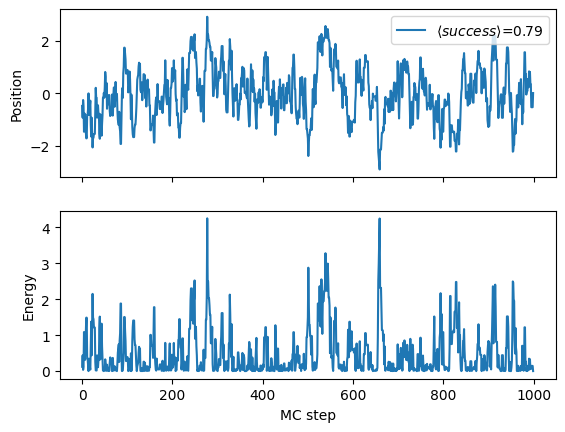

In [42]:
nsteps = 1000
qlist, elist, acclist = MCrun(1, nsteps, 0.)
f, ax = plt.subplots(2,1,sharex=True)
ax[0].plot(qlist, label=r'$\langle success\rangle$=%.2f'%np.mean(acclist)); ax[0].set_ylabel('Position')
ax[1].plot(elist); ax[1].set_ylabel('Energy')
ax[1].set_xlabel('MC step')
ax[0].legend()

## 2. Plot the resulting trajectory $q(t)$ ($t$ is Monte Carlo time) for different values of $\Delta$. 

Also compute the average acceptance as a function of $\Delta$. 

### $q_0=0$

In [33]:
MCrun_Delta = np.vectorize(partial(MCrun,nsteps=int(1e3),q=0.), otypes=['f']) # otype needed to avoid double-running the iterations

Using Delta=0.010.
Delta=0.01, nsteps=1000, q0=0.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 124607.96it/s]


Using Delta=0.050.
Delta=0.05, nsteps=1000, q0=0.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 130326.69it/s]


Using Delta=0.100.
Delta=0.1, nsteps=1000, q0=0.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 133922.03it/s]


Using Delta=0.500.
Delta=0.5, nsteps=1000, q0=0.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 131792.74it/s]


Using Delta=1.000.
Delta=1, nsteps=1000, q0=0.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 132630.41it/s]


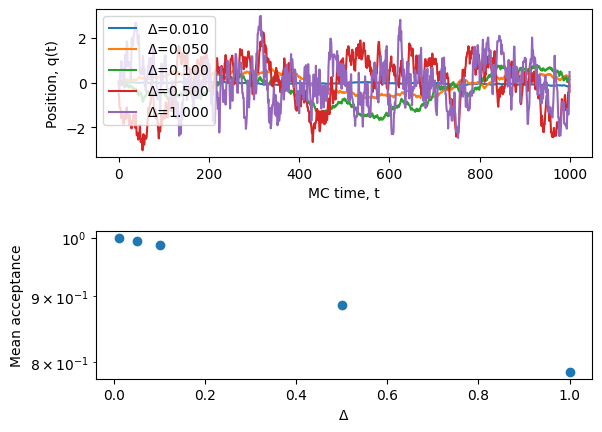

In [34]:
Delta_list = [0.01,0.05,0.1,0.5,1]
acc_list = []
f,ax = plt.subplots(2,1)
f.subplots_adjust(hspace=0.5)
for Delta in Delta_list:
    print('Using Delta=%.3f.'%Delta)
    q, e, accept = MCrun_Delta(Delta)
    # np.savetxt('md_exercises/exercise3/qt_nsteps1e5_q00_Delta%s.dat'%Delta,q)
    ax[0].plot(q, label=r'$\Delta$=%.3f'%Delta)
    acc_list.append(np.mean(accept))
ax[0].set_ylabel('Position, q(t)'); ax[0].set_xlabel('MC time, t')
ax[0].legend()
ax[1].scatter(Delta_list,acc_list)
ax[1].set_ylabel('Mean acceptance'); ax[1].set_xlabel(r'$\Delta$'); ax[1].set_yscale('log')

### $q_0=1$

Smaller $\Delta$ will take much more steps for $q(t)$ to reach equilibrium.

In [28]:
MCrun_q0 = np.vectorize(partial(MCrun,Delta=0.001,nsteps=int(1e5)), otypes=['f'])

Using q0=1.000.
Delta=1, nsteps=100000, q0=1.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 129912.41it/s]


Using q0=10.000.
Delta=1, nsteps=100000, q0=10.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 130558.17it/s]


Using q0=100.000.
Delta=1, nsteps=100000, q0=100.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 129167.19it/s]


Using q0=1000.000.
Delta=1, nsteps=100000, q0=1000.0.


  0%|                                                                                                                                                                         | 0/100000 [00:00<?, ?it/s]/scratch_local/ipykernel_4032049/3698743460.py:18: RuntimeWarning: overflow encountered in exp
  a = np.min([1. ,np.exp(-1. * (utry - u) / kT)])
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 132835.35it/s]


Using q0=10000.000.
Delta=1, nsteps=100000, q0=10000.0.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 126858.24it/s]


Text(0.5, 0, '$q0$')

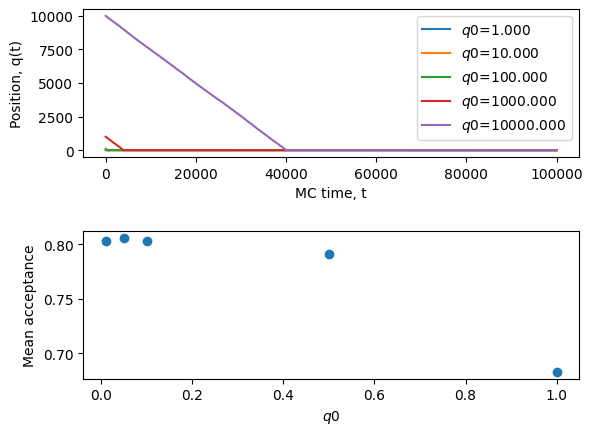

In [ ]:
# Delta_list = [0.01,0.05,0.1,0.5,1]
q0list = [1,10,100,1e3,1e4]
acc_list = []
f,ax = plt.subplots(2,1)
f.subplots_adjust(hspace=0.5)
for q0 in q0list:
    print('Using q0=%i.'%q0)
    q, e, accept = MCrun(Delta=.01,nsteps=100000,q=q0)
    np.savetxt('md_exercises/exercise3/qt_nsteps1e5_q0%s.dat'%q0,q)
    ax[0].plot(q, label=r'$q0$=%.3f'%q0)
    acc_list.append(np.mean(accept))
ax[0].set_ylabel('Position, q(t)'); ax[0].set_xlabel('MC time, t')
ax[0].legend()
ax[1].scatter(Delta_list,acc_list)
ax[1].set_ylabel('Mean acceptance'); ax[1].set_xlabel(r'$q0$')

## 3. (Redo) Compute the average value of $q^2$. 

The result should be equal to $\frac{1}{\sqrt{2\pi}}\int dqq^2e^{-\frac{q^2}{2}}$. Check how many iterations you need to reach an estimate of this integral with a given accuracy. How is the accuracy scaling with the length of the simulation? How does the error depend on the initial condition for $q$? How does the error depend on the choice of $\Delta$? Find the optimal value of $\Delta$ that allows to obtain the most accurate result in the shortest time. 

### Notes on block analysis

Note that,

$$
\langle q^2\rangle = \frac{1}{\sqrt{2\pi}}\int_\Omega dqq^2 e^{-\frac{q^2}{2}} = \frac{1}{\sqrt{2\pi}}\left(\sqrt{2\pi}\right) = 1.
$$

The average is obtained using block analysis, where the iterations of the MC simulation are split into $N_b$ blocks of $L$ iteration steps each. With $N$ total iterations, 
$$
L = \frac{N}{N_b}.
$$

In the context of block analysis, the average of a property $A$ over the whole simulation is the average of the block averages,
$$
\bar{A} = \frac{1}{N_b}\sum_{i=1}^{N_b} \bar{A}_i,
$$
where the $i^{th}$ block average is calculated with the block elements $j$,
$$
\bar{A}_i = \frac{1}{L} \sum_{j=1}^{L}A_{L\times i + j}.
$$

The variance of the block averages are calculated with,
$$
\sigma_A^2 = \frac{1}{N_b-1}\sum_{i}^{N_b}\left(\bar{A}_i-\bar{A}\right)^2,
$$

And the standard error, $\epsilon$, is obtained with,
$$
\epsilon = \frac{\sigma_A^2}{N_b}.
$$

### $\langle q^2\rangle$

#### `nsteps` needed to estimate integral within a given accuracy, or scaling of accuracy.

* For $\Delta=1$, we can reach the desired accuracy with 1e6 iterations. Higher $\Delta$ would require more iterations (tested for 0.01 and it was insufficient for 1e6).
* Not sure yet about the scaling.

In [426]:
nstep_list = np.array([100,1000,10000,100000,1000000])
Nb = 50 # number of blocks
qsq_metrics = [] # holds metrics per nstep
deltaval = 0.1
q0 = 1.

# Simulation
for nstep in nstep_list:
    # Run simulations for different number of iterations
    print('Running simulation for nstep=%s.'%nstep)
    q,_,_ = MCrun(Delta=deltaval,nsteps=nstep,q=q0)

    # Calculate block averages and variances of <q^2>
    L = nstep//Nb
    q = np.array(q)
    qsq_list = [] # holds q^2 values for a particular block
    for i in np.arange(nstep)[::L]: # iterate over blocks
        if i==0:
            print('len of q_block is %s.'%len(q[i:i+L]))
        qsq_blockave = np.mean(q[i:i+L]**2) # bar(q^2)_i
        qsq_list.append(qsq_blockave)
    print('There are %s blocks.'%len(qsq_list))
    
    qsq_totalave = np.mean(qsq_list) # bar(q^2)

    qsq_var = np.var(qsq_list,ddof=1) # sigma_a^2
    qsq_standarderr = np.sqrt(qsq_var/Nb) # epsilon
    qsq_metrics.append([nstep,qsq_totalave,qsq_standarderr]) 
qsq_metrics = np.array(qsq_metrics)

Running simulation for nstep=100.
Delta=0.1, nsteps=100, q0=1.0.


100%|██████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 114161.79it/s]


len of q_block is 2.
There are 50 blocks.
Running simulation for nstep=1000.
Delta=0.1, nsteps=1000, q0=1.0.


100%|████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 132689.15it/s]


len of q_block is 20.
There are 50 blocks.
Running simulation for nstep=10000.
Delta=0.1, nsteps=10000, q0=1.0.


100%|██████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 133729.88it/s]


len of q_block is 200.
There are 50 blocks.
Running simulation for nstep=100000.
Delta=0.1, nsteps=100000, q0=1.0.


100%|████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 134242.56it/s]


len of q_block is 2000.
There are 50 blocks.
Running simulation for nstep=1000000.
Delta=0.1, nsteps=1000000, q0=1.0.


100%|██████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:07<00:00, 133225.52it/s]


len of q_block is 20000.
There are 50 blocks.


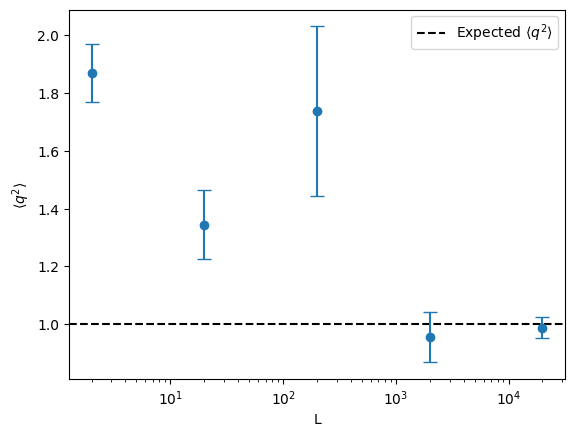

In [427]:
# <q^2> 
plt.axhline(y=1.,ls='--',color='k',label=r'Expected $\langle q^2\rangle$')
plt.errorbar(qsq_metrics[:,0]//Nb,qsq_metrics[:,1],qsq_metrics[:,2], fmt='o', capsize=5)
plt.xscale('log'); plt.ylabel(r'$\langle q^2 \rangle$'); plt.xlabel('L')
plt.legend()

Text(0.5, 0, '$L$')

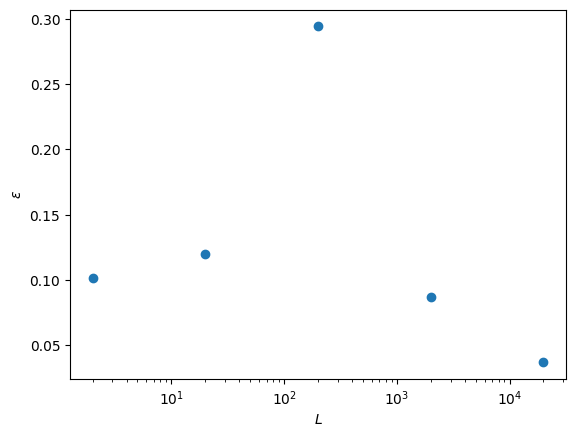

In [428]:
plt.scatter(qsq_metrics[:,0]//Nb,qsq_metrics[:,2]); plt.xscale('log')
plt.ylabel(r'$\varepsilon$'); plt.xlabel(r'$L$')

### Dependence of error to initial condition, $\epsilon(q_0)$.

Also, finding the optimal value of $\Delta$ that allows to obtain the most accurate result in the shortest time. 

In [437]:
q0_list = np.array([0.01,0.1,1,10])
Nb = 50 # number of blocks
qsq_metrics = [] # holds metrics per nstep
deltaval = 0.1
nstep = int(1e6)

# Simulation
for q0 in q0_list:
    # Run simulations for different number of iterations
    print('Running simulation for q0=%s.'%q0)
    q,_,_ = MCrun(Delta=deltaval,nsteps=nstep,q=q0)

    # Calculate block averages and variances of <q^2>
    L = nstep//Nb
    q = np.array(q)
    qsq_list = [] # holds q^2 values for a particular block
    for i in np.arange(nstep)[::L]: # iterate over blocks
        qsq_blockave = np.mean(q[i:i+L]**2) # bar(q^2)_i
        qsq_list.append(qsq_blockave)
    # print('There are %s blocks.'%len(qsq_list))
    
    qsq_totalave = np.mean(qsq_list) # bar(q^2)

    qsq_var = np.var(qsq_list,ddof=1) # sigma_a^2
    qsq_standarderr = np.sqrt(qsq_var/Nb) # epsilon
    qsq_metrics.append([q0,qsq_totalave,qsq_standarderr]) 
qsq_metrics = np.array(qsq_metrics)

Running simulation for q0=0.01.
Delta=0.1, nsteps=1000000, q0=0.01.


  0%|                                                                                                | 0/1000000 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:07<00:00, 126110.93it/s]


Running simulation for q0=0.1.
Delta=0.1, nsteps=1000000, q0=0.1.


100%|██████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:07<00:00, 126382.06it/s]


Running simulation for q0=1.0.
Delta=0.1, nsteps=1000000, q0=1.0.


100%|██████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:07<00:00, 126181.14it/s]


Running simulation for q0=10.0.
Delta=0.1, nsteps=1000000, q0=10.0.


100%|██████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:08<00:00, 124519.04it/s]


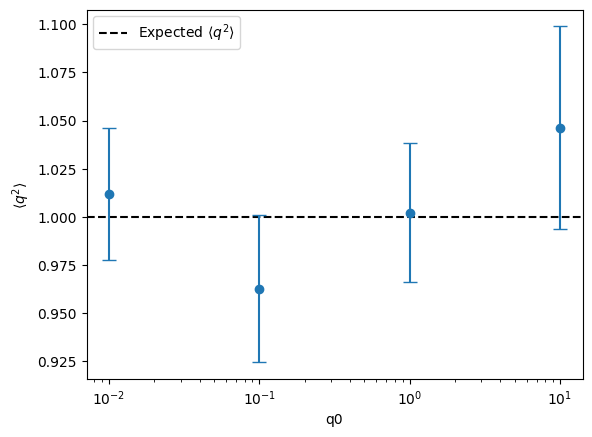

In [438]:
plt.axhline(y=1.,ls='--',color='k',label=r'Expected $\langle q^2\rangle$')
plt.errorbar(qsq_metrics[:,0],qsq_metrics[:,1],qsq_metrics[:,2], fmt='o', capsize=5)
plt.xscale('log'); plt.ylabel(r'$\langle q^2 \rangle$'); plt.xlabel('q0')
plt.legend()

## 4. Now modify the code such that you sample the position of two particles in 3D connected by a spring of equilibrium length $L=4$,

$$
U(\mathbf{q}_1,\mathbf{q}_2) = \frac{1}{2}\left(|\mathbf{q}_1-\mathbf{q}_2|-L\right)^2
$$

Notice that $\mathbf{q}_1$ and $\mathbf{q}_2$ are now vectors with three components each. _(Hint: at every iteration, choose randomly one of the two particles and one of the three possible components and displace it by a random displacement uniformly distributed in $\left[-\Delta,+\Delta\right]$)._ Compute the average distance $|\mathbf{q}_1-\mathbf{q}_2|$ between the two particles.

In [702]:
asdf = np.arange(6)
asdf[:3] - asdf[3:]

array([-3, -3, -3])

In [714]:
np.arange(6)//3, np.arange(6)%3

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))

In [753]:
en_harmonic_vec(np.array([8,0,0,4,0,0]))

np.float64(0.0)

In [8]:
rng = np.random.default_rng(12345) # set global seed variable

def propose_3d2at(vcomposite, Delta): # for 3 dimensions, and two atoms
    dof_select = np.random.randint(6) # selects which component of which atom to propose
    # print('Propose to move coordinate %s of atom %s.'%(dof_select%3,dof_select//3))
    vcomposite[dof_select] += Delta * (2 * rng.random() - 1)
    return vcomposite

def get_dist(vcomp): # qcomp is the composite array of atom coordinates
    return np.sqrt(np.sum((vcomp[:3]-vcomp[3:])**2))

def en_harmonic_vec(vcomp): 
    return 0.5 * (get_dist(vcomp) - 4) ** 2

def MCrun_3d(Delta=0.1, nsteps=int(1e5), q0comp=np.array([4.,0.,0.,0.,0.,0.]), kT = 1):
    '''
    q0comp - np.array of shape (1,6). Concatenated coordinates of atom 1 (q0comp[:3]) and 2 (q0comp[3:])
    '''
    print('Delta=%s, nsteps=%s, atom 1 init coords=%s, atom 2 init coords=%s.'%(Delta,nsteps,q0comp[:3],q0comp[3:]))
    elist = []; dlist = []
    u = en_harmonic_vec(q0comp)
    qcomp = q0comp
    sum = u 
    for i in tqdm.tqdm(range(nsteps)):
        qcomptry = propose_3d2at(qcomp, Delta)
        utry = en_harmonic_vec(qcomptry)
        a = np.min([1. ,np.exp(-1. * (utry - u) / kT)])
        stepflag = a >= rng.random()
        if stepflag:
            qcomp = qcomptry
            u = utry
            # print('Accepted. New positions atom 1 = %s, atom 2 = %s.'%(qcomp[:3],qcomp[3:]))
            # print('d=%.3f.'%get_dist(qcomp))
        # else:
            # print('Rejected. Same positions atom 1 = %s, atom 2 = %s.'%(qcomp[:3],qcomp[3:]))
            # print('d=%.3f.'%get_dist(qcomp))
        dlist.append(get_dist(qcomp))
        sum += u
        elist.append(u)
    return dlist, elist


In [15]:
d,e = MCrun_3d(0.001, int(3e4),q0comp=np.array([4.,0.,0.,0.,0.,0.]))

Delta=0.001, nsteps=30000, atom 1 init coords=[4. 0. 0.], atom 2 init coords=[0. 0. 0.].


100%|███████████████████████████████████████████████████████████████████████████████████| 30000/30000 [00:00<00:00, 44476.78it/s]


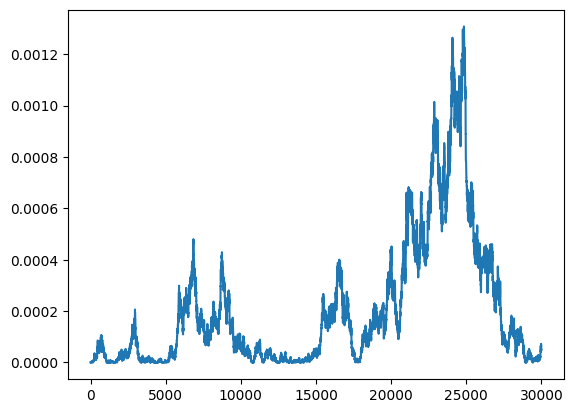

In [16]:
plt.plot(e)

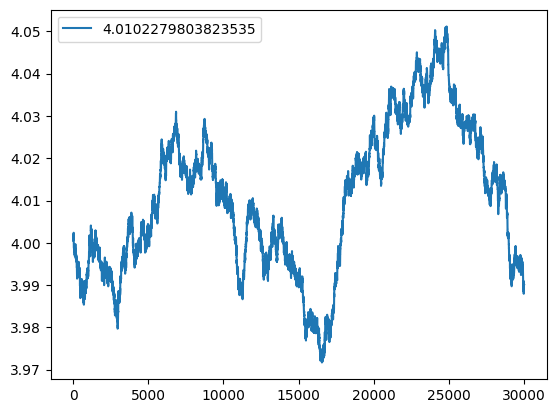

In [17]:
plt.plot(d,label=np.mean(d));plt.legend()